# Chapter 7: Derivatives

Each weight and bias may have different degress of influence on the loss.

We need to understand their impact on the loass before adjusting weights and biases.

The loss function doesn't contain weights or biases, but contains the output of the model.

The weights and biases of the neurons influence this output.

Thus, although we calculate loss from the model's output, the weights and biases directly impact the loss.

## 7.1. The Impact of a Parameter on the Output

A simple function $y = 2x$.

[0 1 2 3 4]
[0 2 4 6 8]


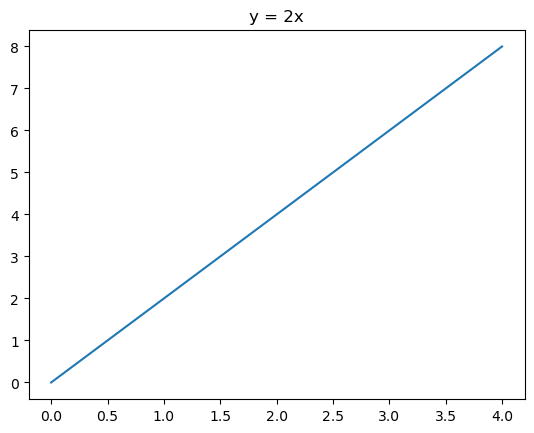

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f (x):
    return 2 * x

x = np.array(range(5))
y = f(x)

print (x)
print (y)

plt.plot(x, y)
plt.title("y = 2x")
plt.show()

## 7.2. The Slope

The slope is used to describe the impact that x will have on y.

The slope of a line is "rise over run":

$$
\frac{ \text{Change in } y}{ \text{Change in } x} = \frac{\Delta y}{\Delta x}
$$

<center><img src='./image/7-1.png' style='width: 60%'/></center>

In [2]:
print ((y[1] - y[0]) / (x[1] - x[0]))

2.0


A nonlinear function $f(x) = 2x^2$

<center><img src='./image/7-2.png' style='width: 60%'/><font color='gray'><i>Approximation of the parabolic function $y = 2x^2$ graphed.</i></font></center>

In [3]:
def f(x):
    return 2 * x ** 2

y = f(x) # Calculate function outputs for new function

print (x)
print (y)

# The slope of the first pair of points
print ((y[1] - y[0]) / (x[1] - x[0]))

# The slope of the second pair of points
print ((y[3] - y[2]) / (x[3] - x[2]))

[0 1 2 3 4]
[ 0  2  8 18 32]
2.0
10.0


<center><img src='./image/7-3.png' style='width: 60%'/><font color='gray'><i>Approximation of the parabolic function's example tangents</i></font></center>

As it is a curve, there is no single slope, slope depends on where we measure it.

In [4]:
# Smaller is better, but can not surpass the limit of Python floating-point precision
p2_delta = 0.0001

x1 = 1
x2 = x1 + p2_delta # add delta

y1 = f(x1) # result at the derivation point
y2 = f(x2) # result at the other, close point

# Exact derivative is 4
approximate_derivative = (y2 - y1) / (x2 - x1)
print(approximate_derivative)

4.0001999999987845


## 7.3. The Numerical Derivative

Calculating the derivative is called numerical differentiation - calculating the slope of the tangent line using two infinitely close points.

<center><img src='./image/7-4.png' style='width: 60%'/><font color='gray'>
<i>Why we want to use 2 points that are sufficiently close - large delta inaccuracy</i></font></center>

<center><img src='./image/7-5.png' style='width: 60%'/><font color='gray'>
<i>Why we want to use 2 points that are sufficiently close - very small delta inaccuracy</i></font></center>

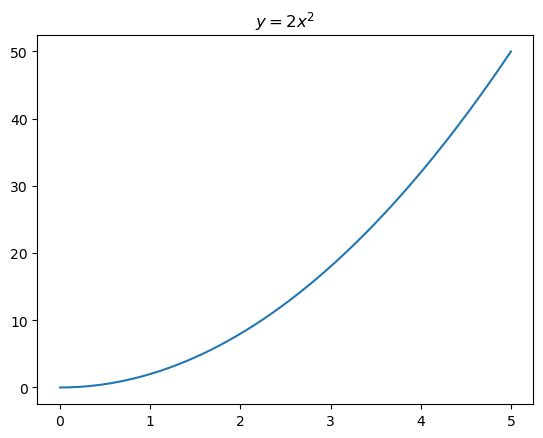

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2 * x ** 2

# np.arange(start, stop, step) to give us smoother line
x = np.arange(0, 5, 0.001)
y = f(x)

plt.plot(x, y)
plt.title("$y=2x^2$")
plt.show()

Derivative of the function will be a straight line $y = mx + b$

$m$ is the slope, $b$ is the $y$-intercept which can "move" the line up or down.

<center><img src='./image/7-6.png' style='width: 60%'/>

<font color='gray'>
<i>Various biases graphed where slope = 1</i></font></center>

$x$ is known and $m$ was computed. So $b = y - mx$.



(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.000199999998785


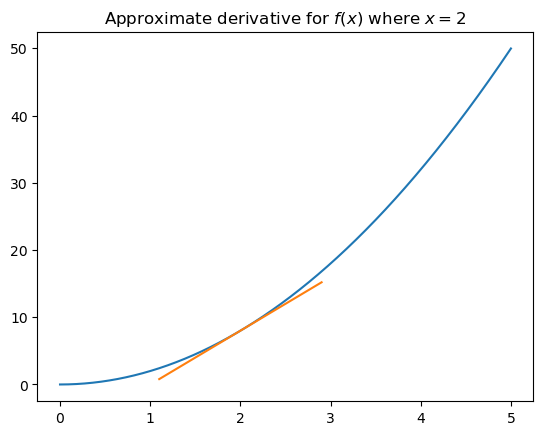

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def f (x):
    return 2 * x ** 2

# np.arange(start, stop, step) to give us smoother line
x = np.arange(0, 5, 0.001)
y = f(x)

plt.plot(x, y)

# The point and the "close enough" point
p2_delta = 0.0001
x1 = 2
x2 = x1 + p2_delta

y1 = f(x1)
y2 = f(x2)

print ((x1, y1), (x2, y2))

# Derivative approximation and y-intercept for the tangent line
approximate_derivative = (y2 - y1) / (x2 - x1)
b = y2 - approximate_derivative * x2

# We put the tangent line calculation into a function so we can call it multiple times for different values of x
# approximate_derivative and b are constant for given function, thus calculated once above this function
def tangent_line(x):
    return approximate_derivative * x + b

# plotting the tangent line
# +/- 0.9 to draw the tangent line on our graph
# then we calculate the y for given x using the tangent line function
# Matplotlib will draw a line for us through these points
to_plot = [x1 - 0.9, x1, x1 + 0.9]
plt.plot(to_plot, [tangent_line(i) for i in to_plot])

print(f'Approximate derivative for f(x) where x = {x1} is {approximate_derivative}')
plt.title('Approximate derivative for $f(x)$ where $x = 2$')
plt.show()


We care only about the slope of this tangent line, as it informs us about the impact that $x$ has on this function at a particular point (i.e., the instantaneous rate of change).

Plot multiple tangent lines for various inputs $x$.

(0, 0) (0.0001, 2e-08)
Approximate derivative for f(x) where x = 0 is 0.00019999999999999998
(1, 2) (1.0001, 2.00040002)
Approximate derivative for f(x) where x = 1 is 4.0001999999987845
(2, 8) (2.0001, 8.000800020000002)


Approximate derivative for f(x) where x = 2 is 8.000199999998785
(3, 18) (3.0001, 18.001200020000002)
Approximate derivative for f(x) where x = 3 is 12.000199999998785
(4, 32) (4.0001, 32.00160002)
Approximate derivative for f(x) where x = 4 is 16.000200000016548


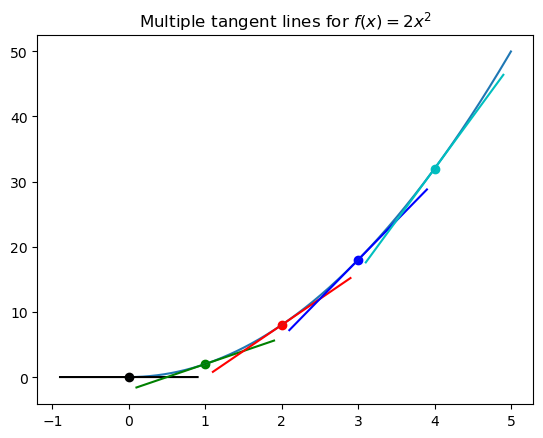

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2 * x ** 2

# np.arange(start, stop, step) to give us a smoother curve
x = np.array(np.arange(0, 5, 0.001))
y = f(x)

plt.plot(x, y)

colors = ['k' , 'g' , 'r' , 'b' , 'c']

def approximate_tangent_line(x, approximate_derivative):
    return(approximate_derivative * x) + b

for i in range (5):
    p2_delta = 0.0001
    x1 = i
    x2 = x1 + p2_delta

    y1 = f(x1)
    y2 = f(x2)

    print ((x1, y1), (x2, y2))
    approximate_derivative = (y2 - y1) / (x2 - x1)
    b = y2 - (approximate_derivative * x2)

    to_plot = [x1 - 0.9 , x1, x1 + 0.9 ]

    plt.scatter(x1, y1, c = colors[i])
    plt.plot([point for point in to_plot],
             [approximate_tangent_line(point, approximate_derivative)
              for point in to_plot],
             c = colors[i])
    print(f'Approximate derivative for f(x) where x = {x1} is {approximate_derivative}')

plt.title('Multiple tangent lines for $f(x) = 2x^2$')
plt.show()

The actual function employed in our neural network is <font color='red'>not simple</font>. The loss function contains all of the layers, weights, and biases in multiple dimensions!

Calculating derivatives using numerical differentiation requires multiple forward passes for a single parameter update.

We need to perform the forward pass as a reference, then update a single parameter by the delta value and perform the forward pass through our model again to see the change of the loss value.

Next, we need to calculate the derivative and revert the parameter change that we made for this calculation.

We have to repeat this for every weight and bias and for every sample, which will be very <font color='red'>time-consuming</font>. This method is refered as <font color='red'>brute-forcing the derivative calculations</font>.

The actual loss function is a multivariate function, that takes multiple parameters - we will see its in the part of partial derivative.


## 7.4. The Analytical Derivative

Numerical derivative is an approximation and never gets more complicated.

Analytical derivative is exact and quicker solution, but the complexity varies.

The prime notation and Leibniz's notation have the same meaning.


$$
f'(x) = \frac{d}{dx} f(x) = \frac{df}{dx} (x) = \frac{d \ f(x)}{dx}
$$

The derivative of constants:

$$
\frac{d}{dx} 1 = 0
\frac{d}{dx} m = 0
$$

The derivative of $x$:

$$
\frac{d}{dx} x = 1
$$

The derivative of a linear function equals its slope:

$$
\frac{d}{dx} mx + b= m
$$

The derivative of a constant multiple of the function.

$$
\frac{d}{dx} \big[ k \cdot f(x)  \big] = k \cdot \frac{d}{dx}  f(x)
$$

The derivative of a sum of functions equals their derivatives:

$$
\frac{d}{dx} \big[ f(x) + g(x) \big]  = \frac{d}{dx} f(x) + \frac{d}{dx} g(x) = f'(x) + g'(x)
$$

The same concept applies to subtraction:

$$
\frac{d}{dx} \big[ f(x) - g(x)  \big] = \frac{d}{dx}  f(x) - \frac{d}{dx}  g(x) = f'(x) - g'(x)
$$

The derivative of an exponentiation:

$$
\frac{d}{dx} x^n= n \cdot x^{n-1}
$$

For example:

$$
\begin{align}
f(x) = 5x^5 + 4x^3 - 5 \quad \to \quad \frac{d}{dx} f(x) & = \frac{d}{dx} \big[ 5x^5 + 4x^3 - 5 \big] \\
& = \frac{d}{dx} 5x^5 + \frac{d}{dx}4x^3  - \frac{d}{dx} 5 \\
& = 5 \cdot \frac{d}{dx} x^5 + 4 \cdot \frac{d}{dx} x^3 - \frac{d}{dx} 5 \\
& = 5 \cdot 5 x^{5-1} + 4 \cdot 3x^{3-1} - 0 \\
& = 5 \cdot 5 x^4 + 4 \cdot 3x^2 \\
& = 25 x^4 + 12 x^2 \
\end{align}
$$

$$
\begin{align}
f(x) = x^3 + 2x^2 - 5x + 7  \quad \to \quad \frac{d}{dx} f(x) & = \frac{d}{dx} \big[ x^3 + 2x^2 - 5x + 7 \big] \\
& = \frac{d}{dx} x^3 + \frac{d}{dx} 2x^2 - \frac{d}{dx} 5x + \frac{d}{dx} 7 \\
& = \frac{d}{dx} x^3 + 2 \cdot \frac{d}{dx} x^2 - 5 \cdot \frac{d}{dx} x + \frac{d}{dx} 7 \\
& = 3x^{3-1} + 2 \cdot 2x^{2-1} - 5 \cdot 1 x^{1-1} + 0 \\
& = 3x^2 + 2 \cdot 2 x^1 - 5 \cdot 1 + 0 \\
& = 3x^2 + 4x - 5 \
\end{align}
$$

We will go a step further and cover partial derivatives in the next chapter.
